# Analysis and preparation of NZDep data for model

### Steps
* Add missing areas (from SA2 shapefile) to depData. (all would be zeroes - oceanic regions etc)
* Check area names congruency - must match names in shapefile
* Aggregate to one NZDep score per SA2
* Test correlation with affluence variable


In [23]:
import pandas as pd 
from pandas import DataFrame, read_csv
import math
import numpy as np
import statistics
import matplotlib.pyplot as plt

from decimal import Decimal

from numpy import cov
from scipy.stats import pearsonr
from scipy.stats import spearmanr

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
ourData=pd.read_csv("NZLogSprawl_DataCombo_noHousehold.csv")
ourData=ourData.drop("Unnamed: 0",axis=1)
NZDepData=pd.read_excel("NZDep_JoinedbySA2s.xlsx")
check_shp=pd.read_csv("./GISData/statsnzstatistical-area-2-2020-generalised-SHP/statistical-area-2-2020-tablecsv.csv")

In [3]:
NZDepData.head()

,MB2018_V1_,LANDWATER,LANDWATER_,MB,MB2001,MB2006,MB2013,MB2018,CAU_num_20,NZDep2001,NZDep_scor,UR_pop_200,NZDep2006,NZDep_sc_1,UR_pop_201,CAU_num_21,CAU_2013,NZDep2013,NZDep_sc_2,UR_pop_202,NZDep2018,NZDep2018_,SA22020_V1,SA22020__1,SA22020__2
0,502,12,Mainland,502,502,502,502,502,500206,10,1161,33,9,1110,24,500206,500206,9,1126,36,10,1245,100100,North Cape,North Cape
1,600,12,Mainland,600,600,600,600,600,500206,10,1161,48,9,1110,45,500206,500206,10,1167,39,10,1245,100100,North Cape,North Cape
2,800,12,Mainland,800,800,800,800,800,500206,10,1162,162,10,1186,150,500206,500206,10,1256,105,10,1207,100100,North Cape,North Cape
3,1201,12,Mainland,1201,1201,1201,1201,1201,500207,7,1029,54,7,1026,75,500207,500207,8,1035,93,9,1093,100100,North Cape,North Cape
4,1500,12,Mainland,1500,1500,1500,1500,1500,500208,7,1014,21,8,1063,24,500208,500208,7,1010,21,8,1065,100200,Rangaunu Harbour,Rangaunu Harbour


In [4]:
set1=set(check_shp.SA22020_V1_00_NAME_ASCII.tolist())
set2=set(np.unique(NZDepData.SA22020__2.tolist()))
setDiff=set1.difference(set2)

#for diff in setDiff:
 #   print(diff)
 #   print(ourData.loc[ourData['Area']==diff,'TotPeople'])

In [5]:
checks={'Inlets Far North District','Inlets other Auckland','Inlets Thames-Coromandel District','Inlets Fiordland','Oceanic Waikato Region East'
        ,'Inlets Waikato District','Inlet Port Napier','Oceanic Auckland Region East','Inlets other Whangarei District'
        ,'Inlet Otago Harbour','Oceanic Northland Region','Inlets other Dunedin City','Marlborough Sounds Coastal Marine'
        ,'Inlet Waitemata Harbour','Oceanic Taranaki Region','Bays Waiheke Island','Oceanic Gisborne Region'
        ,'Oceanic Auckland Region West','Inlet Manukau Harbour','Inlet Whangarei Harbour'
        ,'Inlets Nelson City'}


In [6]:
#What's in Set 1 and not Set 2
set2.difference(set1)

set()

In [7]:
ourData[(ourData['Area'].isin(checks))&(ourData['TotInd_GeogUnits']>0)]

,Area,ParentArea,Year,TotInd_GeogUnits,Wholesale_GeogUnits,Retail_GeogUnits,TransPostWare_GeogUnits,Perc_affl_50,Perc_affl_75,TotPeople,perc_Maori_Pacific,perc_AsiMidELatinAfr,TotLabForce,percUnempLabForce,NZDepIndex,NZDepScore
27,Inlets other Auckland,AucklandRegion,2006,21.0,3.0,3.0,0.0,0.000000,0.000000,45.0,0.000000,0.000000,27.0,0.000000,NaN,NaN
100,Inlet Waitemata Harbour,AucklandRegion,2006,3.0,0.0,0.0,0.0,0.000000,0.000000,21.0,0.571429,0.142857,12.0,0.250000,NaN,NaN
321,Inlet Manukau Harbour,AucklandRegion,2006,6.0,0.0,0.0,0.0,0.000000,0.000000,3.0,0.000000,0.000000,3.0,0.000000,NaN,NaN
380,Bays Waiheke Island,AucklandRegion,2006,3.0,0.0,0.0,0.0,0.000000,0.000000,9.0,0.000000,0.000000,9.0,0.000000,NaN,NaN
590,Inlets other Auckland,AucklandRegion,2013,6.0,3.0,0.0,0.0,0.000000,0.000000,12.0,0.000000,0.000000,9.0,0.000000,NaN,NaN
663,Inlet Waitemata Harbour,AucklandRegion,2013,3.0,0.0,0.0,0.0,0.000000,0.000000,24.0,0.125000,0.000000,15.0,0.200000,NaN,NaN
884,Inlet Manukau Harbour,AucklandRegion,2013,9.0,0.0,3.0,0.0,0.000000,0.000000,18.0,0.166667,0.500000,9.0,0.000000,NaN,NaN
1226,Inlet Waitemata Harbour,AucklandRegion,2018,3.0,0.0,0.0,0.0,0.700000,0.350000,84.0,0.142857,0.392857,63.0,0.000000,NaN,NaN
1447,Inlet Manukau Harbour,AucklandRegion,2018,3.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,NaN,NaN
3829,Marlborough Sounds Coastal Marine,MarlboroughRegion,2006,30.0,0.0,3.0,0.0,0.500000,0.333333,51.0,0.117647,0.000000,30.0,0.000000,NaN,NaN


Of the 21 areas that are not included in the Dep data, the ones that actually have logistics facilities in any of the years are:
* Inlets other Auckland (2006;2013)
* Inlet Manukau Harbour (2013)
* Marlborough Sounds Coastal Marine (2013)
* Inlets Far North District (2013)
* Inlets Thames-Coromandel District (2006; 2013)

So I think it is safe to just disregard these areas NZDep = NaN


In [8]:
#aggregate Meshblock data to SA2 in NZDepData and assign to ourData
ourData['NZDepIndex']=np.nan
ourData['NZDepScore']=np.nan
for i in range(len(ourData)):
    if(np.logical_not(ourData.iloc[i,0] in setDiff)):
        if(ourData.iloc[i,2]==2006):
            ourData.iloc[i,14]=statistics.median(NZDepData.loc[NZDepData['SA22020__2']==ourData.iloc[i,0],'NZDep2006'])
            ourData.iloc[i,15]=statistics.median(NZDepData.loc[NZDepData['SA22020__2']==ourData.iloc[i,0],'NZDep_sc_1'])
        elif(ourData.iloc[i,2]==2013):
            ourData.iloc[i,14]=statistics.median(NZDepData.loc[NZDepData['SA22020__2']==ourData.iloc[i,0],'NZDep2013'])
            ourData.iloc[i,15]=statistics.median(NZDepData.loc[NZDepData['SA22020__2']==ourData.iloc[i,0],'NZDep_sc_2'])
        else:
            ourData.iloc[i,14]=statistics.median(NZDepData.loc[NZDepData['SA22020__2']==ourData.iloc[i,0],'NZDep2018'])
            ourData.iloc[i,15]=statistics.median(NZDepData.loc[NZDepData['SA22020__2']==ourData.iloc[i,0],'NZDep2018_'])
            
      

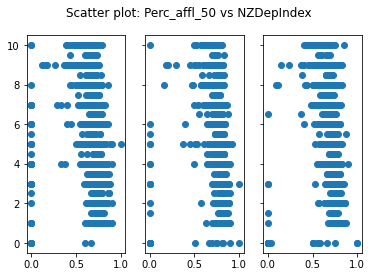

In [19]:
## Perc_affl_50 and NZDepIndex
#covariance
DAT=ourData.dropna()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,sharex=True,sharey=True)
fig.suptitle('Scatter plot: Perc_affl_50 vs NZDepIndex')
ax1.scatter(DAT.loc[ourData['Year']==2006,'Perc_affl_50'], DAT.loc[ourData['Year']==2006,'NZDepIndex'])
ax2.scatter(DAT.loc[ourData['Year']==2013,'Perc_affl_50'], DAT.loc[ourData['Year']==2013,'NZDepIndex'])
ax3.scatter(DAT.loc[ourData['Year']==2018,'Perc_affl_50'], DAT.loc[ourData['Year']==2018,'NZDepIndex'])

In [25]:
# Covariance

print("2006")
covariance = np.cov(DAT.loc[DAT['Year']==2006,'Perc_affl_50'], DAT.loc[DAT['Year']==2006,'NZDepIndex'])
print(covariance)

# Pearson's correlation
corrP, pval = pearsonr(DAT.loc[DAT['Year']==2006,'Perc_affl_50'], DAT.loc[DAT['Year']==2006,'NZDepIndex'])
print('Pearsons correlation: %.3f'% corrP,'p-val %.2E' % Decimal(pval))

# Spearman's correlation
corrS, pval = spearmanr(DAT.loc[DAT['Year']==2006,'Perc_affl_50'], DAT.loc[DAT['Year']==2006,'NZDepIndex'])
print('Spearmans correlation: %.3f' % corrS,'p-val %.2E' % Decimal(pval))

print("2013")
covariance = np.cov(DAT.loc[DAT['Year']==2013,'Perc_affl_50'], DAT.loc[DAT['Year']==2013,'NZDepIndex'])
print(covariance)

# Pearson's correlation
corrP, pval = pearsonr(DAT.loc[DAT['Year']==2013,'Perc_affl_50'], DAT.loc[DAT['Year']==2013,'NZDepIndex'])
print('Pearsons correlation: %.3f'% corrP,'p-val %.2E' % Decimal(pval))

# Spearman's correlation
corrS, pval = spearmanr(DAT.loc[DAT['Year']==2013,'Perc_affl_50'], DAT.loc[DAT['Year']==2013,'NZDepIndex'])
print('Spearmans correlation: %.3f' % corrS,'p-val %.2E' % Decimal(pval))

print("2018")
covariance = np.cov(DAT.loc[DAT['Year']==2018,'Perc_affl_50'], DAT.loc[DAT['Year']==2018,'NZDepIndex'])
print(covariance)

# Pearson's correlation
corrP, pval = pearsonr(DAT.loc[DAT['Year']==2018,'Perc_affl_50'], DAT.loc[DAT['Year']==2018,'NZDepIndex'])
print('Pearsons correlation: %.3f'% corrP,'p-val %.2E' % Decimal(pval))

# Spearman's correlation
corrS, pval = spearmanr(DAT.loc[DAT['Year']==2018,'Perc_affl_50'], DAT.loc[DAT['Year']==2018,'NZDepIndex'])
print('Spearmans correlation: %.3f' % corrS,'p-val %.2E' % Decimal(pval))

2006
[[ 0.01518461 -0.09028314]
 [-0.09028314  6.80850567]]
Pearsons correlation: -0.281 p-val 1.17E-40
Spearmans correlation: -0.547 p-val 4.33E-170
2013
[[ 0.01521533 -0.03390799]
 [-0.03390799  7.12745161]]
Pearsons correlation: -0.103 p-val 1.51E-06
Spearmans correlation: -0.546 p-val 8.30E-169
2018
[[ 0.01368679 -0.06135473]
 [-0.06135473  7.28808767]]
Pearsons correlation: -0.194 p-val 6.38E-20
Spearmans correlation: -0.598 p-val 4.90E-211


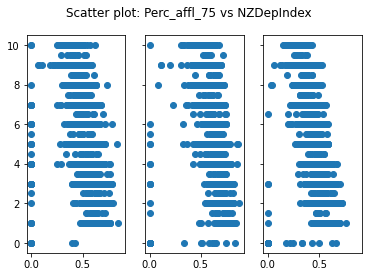

In [26]:
## Perc_affl_75 and NZDepIndex
#covariance
DAT=ourData.dropna()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,sharex=True,sharey=True)
fig.suptitle('Scatter plot: Perc_affl_75 vs NZDepIndex')
ax1.scatter(DAT.loc[ourData['Year']==2006,'Perc_affl_75'], DAT.loc[ourData['Year']==2006,'NZDepIndex'])
ax2.scatter(DAT.loc[ourData['Year']==2013,'Perc_affl_75'], DAT.loc[ourData['Year']==2013,'NZDepIndex'])
ax3.scatter(DAT.loc[ourData['Year']==2018,'Perc_affl_75'], DAT.loc[ourData['Year']==2018,'NZDepIndex'])

In [28]:
# Covariance

print("2006")
#covariance = np.cov(DAT.loc[DAT['Year']==2006,'Perc_affl_50'], DAT.loc[DAT['Year']==2006,'NZDepIndex'])
#print(covariance)

# Pearson's correlation
corrP, pval = pearsonr(DAT.loc[DAT['Year']==2006,'Perc_affl_75'], DAT.loc[DAT['Year']==2006,'NZDepIndex'])
print('Pearsons correlation: %.3f'% corrP,'p-val %.2E' % Decimal(pval))

# Spearman's correlation
corrS, pval = spearmanr(DAT.loc[DAT['Year']==2006,'Perc_affl_75'], DAT.loc[DAT['Year']==2006,'NZDepIndex'])
print('Spearmans correlation: %.3f' % corrS,'p-val %.2E' % Decimal(pval))

print("2013")
#covariance = np.cov(DAT.loc[DAT['Year']==2013,'Perc_affl_75'], DAT.loc[DAT['Year']==2013,'NZDepIndex'])
#print(covariance)

# Pearson's correlation
corrP, pval = pearsonr(DAT.loc[DAT['Year']==2013,'Perc_affl_75'], DAT.loc[DAT['Year']==2013,'NZDepIndex'])
print('Pearsons correlation: %.3f'% corrP,'p-val %.2E' % Decimal(pval))

# Spearman's correlation
corrS, pval = spearmanr(DAT.loc[DAT['Year']==2013,'Perc_affl_75'], DAT.loc[DAT['Year']==2013,'NZDepIndex'])
print('Spearmans correlation: %.3f' % corrS,'p-val %.2E' % Decimal(pval))

print("2018")
#covariance = np.cov(DAT.loc[DAT['Year']==2018,'Perc_affl_75'], DAT.loc[DAT['Year']==2018,'NZDepIndex'])
#print(covariance)

# Pearson's correlation
corrP, pval = pearsonr(DAT.loc[DAT['Year']==2018,'Perc_affl_75'], DAT.loc[DAT['Year']==2018,'NZDepIndex'])
print('Pearsons correlation: %.3f'% corrP,'p-val %.2E' % Decimal(pval))

# Spearman's correlation
corrS, pval = spearmanr(DAT.loc[DAT['Year']==2018,'Perc_affl_75'], DAT.loc[DAT['Year']==2018,'NZDepIndex'])
print('Spearmans correlation: %.3f' % corrS,'p-val %.2E' % Decimal(pval))

2006
Pearsons correlation: -0.489 p-val 3.21E-131
Spearmans correlation: -0.629 p-val 8.39E-240
2013
Pearsons correlation: -0.296 p-val 4.77E-45
Spearmans correlation: -0.604 p-val 1.54E-216
2018
Pearsons correlation: -0.550 p-val 3.29E-172
Spearmans correlation: -0.706 p-val 0.00E+00


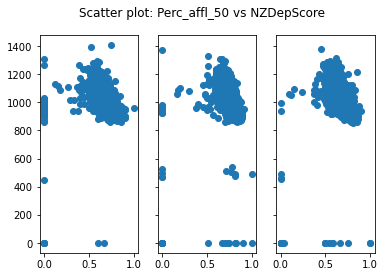

In [77]:
## Perc_affl_50 and NZDepScore
#covariance
DAT=ourData.dropna()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,sharex=True,sharey=True)
fig.suptitle('Scatter plot: Perc_affl_50 vs NZDepScore')
ax1.scatter(DAT.loc[ourData['Year']==2006,'Perc_affl_50'], DAT.loc[ourData['Year']==2006,'NZDepScore'])
ax2.scatter(DAT.loc[ourData['Year']==2013,'Perc_affl_50'], DAT.loc[ourData['Year']==2013,'NZDepScore'])
ax3.scatter(DAT.loc[ourData['Year']==2018,'Perc_affl_50'], DAT.loc[ourData['Year']==2018,'NZDepScore'])

In [16]:
# Covariance

print("2006")
covariance = np.cov(DAT.loc[DAT['Year']==2006,'Perc_affl_50'], DAT.loc[DAT['Year']==2006,'NZDepScore'])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(DAT.loc[DAT['Year']==2006,'Perc_affl_50'], DAT.loc[DAT['Year']==2006,'NZDepScore'])
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(DAT.loc[DAT['Year']==2006,'Perc_affl_50'], DAT.loc[DAT['Year']==2006,'NZDepScore'])
print('Spearmans correlation: %.3f' % corrS)

print("2013")
covariance = np.cov(DAT.loc[DAT['Year']==2013,'Perc_affl_50'], DAT.loc[DAT['Year']==2013,'NZDepScore'])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(DAT.loc[DAT['Year']==2013,'Perc_affl_50'], DAT.loc[DAT['Year']==2013,'NZDepScore'])
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(DAT.loc[DAT['Year']==2013,'Perc_affl_50'], DAT.loc[DAT['Year']==2013,'NZDepScore'])
print('Spearmans correlation: %.3f' % corrS)

print("2018")
covariance = np.cov(DAT.loc[DAT['Year']==2018,'Perc_affl_50'], DAT.loc[DAT['Year']==2018,'NZDepScore'])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(DAT.loc[DAT['Year']==2018,'Perc_affl_50'], DAT.loc[DAT['Year']==2018,'NZDepScore'])
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(DAT.loc[DAT['Year']==2018,'Perc_affl_50'], DAT.loc[DAT['Year']==2018,'NZDepScore'])
print('Spearmans correlation: %.3f' % corrS)

2006
[[ 1.51846062e-02 -1.30067857e+00]
 [-1.30067857e+00  9.22921443e+03]]
Pearsons correlation: -0.110
Spearmans correlation: -0.551
2013
[[1.52153265e-02 7.35350274e+00]
 [7.35350274e+00 2.35209475e+04]]
Pearsons correlation: 0.389
Spearmans correlation: -0.547
2018
[[1.36867895e-02 6.54921408e+00]
 [6.54921408e+00 2.55323655e+04]]
Pearsons correlation: 0.350
Spearmans correlation: -0.603


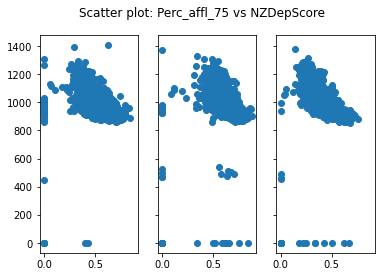

In [39]:
## Perc_affl_75 and NZDepScore
#covariance
DAT=ourData.dropna()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,sharex=True,sharey=True)
fig.suptitle('Scatter plot: Perc_affl_75 vs NZDepScore')
ax1.scatter(DAT.loc[ourData['Year']==2006,'Perc_affl_75'], DAT.loc[ourData['Year']==2006,'NZDepScore'])
ax2.scatter(DAT.loc[ourData['Year']==2013,'Perc_affl_75'], DAT.loc[ourData['Year']==2013,'NZDepScore'])
ax3.scatter(DAT.loc[ourData['Year']==2018,'Perc_affl_75'], DAT.loc[ourData['Year']==2018,'NZDepScore'])

In [40]:
print("2006")

# Pearson's correlation
corrP, pval = pearsonr(DAT.loc[DAT['Year']==2006,'Perc_affl_75'], DAT.loc[DAT['Year']==2006,'NZDepScore'])
print('Pearsons correlation: %.3f'% corrP,'p-val %.2E' % Decimal(pval))

# Spearman's correlation
corrS, pval = spearmanr(DAT.loc[DAT['Year']==2006,'Perc_affl_75'], DAT.loc[DAT['Year']==2006,'NZDepScore'])
print('Spearmans correlation: %.3f' % corrS,'p-val %.2E' % Decimal(pval))

print("2013")

# Pearson's correlation
corrP, pval = pearsonr(DAT.loc[DAT['Year']==2013,'Perc_affl_75'], DAT.loc[DAT['Year']==2013,'NZDepScore'])
print('Pearsons correlation: %.3f'% corrP,'p-val %.2E' % Decimal(pval))

# Spearman's correlation
corrS, pval = spearmanr(DAT.loc[DAT['Year']==2013,'Perc_affl_75'], DAT.loc[DAT['Year']==2013,'NZDepScore'])
print('Spearmans correlation: %.3f' % corrS,'p-val %.2E' % Decimal(pval))

print("2018")

# Pearson's correlation
corrP, pval = pearsonr(DAT.loc[DAT['Year']==2018,'Perc_affl_75'], DAT.loc[DAT['Year']==2018,'NZDepScore'])
print('Pearsons correlation: %.3f'% corrP,'p-val %.2E' % Decimal(pval))

# Spearman's correlation
corrS, pval = spearmanr(DAT.loc[DAT['Year']==2018,'Perc_affl_75'], DAT.loc[DAT['Year']==2018,'NZDepScore'])
print('Spearmans correlation: %.3f' % corrS,'p-val %.2E' % Decimal(pval))

2006
Pearsons correlation: -0.296 p-val 3.69E-45
Spearmans correlation: -0.632 p-val 4.16E-243
2013
Pearsons correlation: 0.227 p-val 8.46E-27
Spearmans correlation: -0.605 p-val 4.31E-217
2018
Pearsons correlation: -0.001 p-val 9.46E-01
Spearmans correlation: -0.712 p-val 0.00E+00


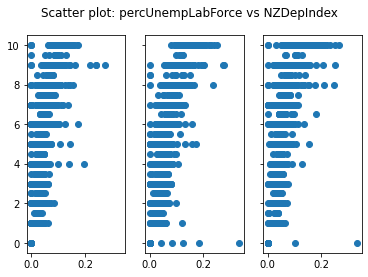

In [37]:
## percUnempLabForce and NZDepIndex
#covariance
DAT=ourData.dropna()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,sharex=True,sharey=True)
fig.suptitle('Scatter plot: percUnempLabForce vs NZDepIndex')
ax1.scatter(DAT.loc[ourData['Year']==2006,'percUnempLabForce'], DAT.loc[ourData['Year']==2006,'NZDepIndex'])
ax2.scatter(DAT.loc[ourData['Year']==2013,'percUnempLabForce'], DAT.loc[ourData['Year']==2013,'NZDepIndex'])
ax3.scatter(DAT.loc[ourData['Year']==2018,'percUnempLabForce'], DAT.loc[ourData['Year']==2018,'NZDepIndex'])

In [38]:
print("2006")

# Pearson's correlation
corrP, pval = pearsonr(DAT.loc[DAT['Year']==2006,'percUnempLabForce'], DAT.loc[DAT['Year']==2006,'NZDepIndex'])
print('Pearsons correlation: %.3f'% corrP,'p-val %.2E' % Decimal(pval))

# Spearman's correlation
corrS, pval = spearmanr(DAT.loc[DAT['Year']==2006,'percUnempLabForce'], DAT.loc[DAT['Year']==2006,'NZDepIndex'])
print('Spearmans correlation: %.3f' % corrS,'p-val %.2E' % Decimal(pval))

print("2013")

# Pearson's correlation
corrP, pval = pearsonr(DAT.loc[DAT['Year']==2013,'percUnempLabForce'], DAT.loc[DAT['Year']==2013,'NZDepIndex'])
print('Pearsons correlation: %.3f'% corrP,'p-val %.2E' % Decimal(pval))

# Spearman's correlation
corrS, pval = spearmanr(DAT.loc[DAT['Year']==2013,'percUnempLabForce'], DAT.loc[DAT['Year']==2013,'NZDepIndex'])
print('Spearmans correlation: %.3f' % corrS,'p-val %.2E' % Decimal(pval))

print("2018")

# Pearson's correlation
corrP, pval = pearsonr(DAT.loc[DAT['Year']==2018,'percUnempLabForce'], DAT.loc[DAT['Year']==2018,'NZDepIndex'])
print('Pearsons correlation: %.3f'% corrP,'p-val %.2E' % Decimal(pval))

# Spearman's correlation
corrS, pval = spearmanr(DAT.loc[DAT['Year']==2018,'percUnempLabForce'], DAT.loc[DAT['Year']==2018,'NZDepIndex'])
print('Spearmans correlation: %.3f' % corrS,'p-val %.2E' % Decimal(pval))

2006
Pearsons correlation: 0.700 p-val 6.91E-320
Spearmans correlation: 0.731 p-val 0.00E+00
2013
Pearsons correlation: 0.745 p-val 0.00E+00
Spearmans correlation: 0.771 p-val 0.00E+00
2018
Pearsons correlation: 0.700 p-val 2.95E-319
Spearmans correlation: 0.750 p-val 0.00E+00


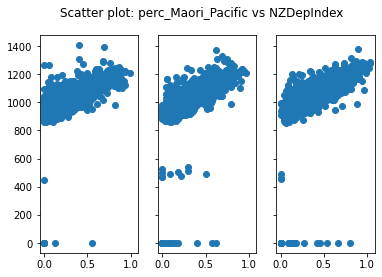

In [33]:
## perc_Maori_Pacific and NZDepIndex
#covariance
DAT=ourData.dropna()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,sharex=True,sharey=True)
fig.suptitle('Scatter plot: perc_Maori_Pacific vs NZDepIndex')
ax1.scatter(DAT.loc[ourData['Year']==2006,'perc_Maori_Pacific'], DAT.loc[ourData['Year']==2006,'NZDepIndex'])
ax2.scatter(DAT.loc[ourData['Year']==2013,'perc_Maori_Pacific'], DAT.loc[ourData['Year']==2013,'NZDepIndex'])
ax3.scatter(DAT.loc[ourData['Year']==2018,'perc_Maori_Pacific'], DAT.loc[ourData['Year']==2018,'NZDepIndex'])

In [34]:
print("2006")

# Pearson's correlation
corrP, pval = pearsonr(DAT.loc[DAT['Year']==2006,'perc_Maori_Pacific'], DAT.loc[DAT['Year']==2006,'NZDepIndex'])
print('Pearsons correlation: %.3f'% corrP,'p-val %.2E' % Decimal(pval))

# Spearman's correlation
corrS, pval = spearmanr(DAT.loc[DAT['Year']==2006,'perc_Maori_Pacific'], DAT.loc[DAT['Year']==2006,'NZDepIndex'])
print('Spearmans correlation: %.3f' % corrS,'p-val %.2E' % Decimal(pval))

print("2013")

# Pearson's correlation
corrP, pval = pearsonr(DAT.loc[DAT['Year']==2013,'perc_Maori_Pacific'], DAT.loc[DAT['Year']==2013,'NZDepIndex'])
print('Pearsons correlation: %.3f'% corrP,'p-val %.2E' % Decimal(pval))

# Spearman's correlation
corrS, pval = spearmanr(DAT.loc[DAT['Year']==2013,'perc_Maori_Pacific'], DAT.loc[DAT['Year']==2013,'NZDepIndex'])
print('Spearmans correlation: %.3f' % corrS,'p-val %.2E' % Decimal(pval))

print("2018")

# Pearson's correlation
corrP, pval = pearsonr(DAT.loc[DAT['Year']==2018,'perc_Maori_Pacific'], DAT.loc[DAT['Year']==2018,'NZDepIndex'])
print('Pearsons correlation: %.3f'% corrP,'p-val %.2E' % Decimal(pval))

# Spearman's correlation
corrS, pval = spearmanr(DAT.loc[DAT['Year']==2018,'perc_Maori_Pacific'], DAT.loc[DAT['Year']==2018,'NZDepIndex'])
print('Spearmans correlation: %.3f' % corrS,'p-val %.2E' % Decimal(pval))

2006
Pearsons correlation: 0.624 p-val 6.53E-235
Spearmans correlation: 0.717 p-val 0.00E+00
2013
Pearsons correlation: 0.494 p-val 7.10E-134
Spearmans correlation: 0.750 p-val 0.00E+00
2018
Pearsons correlation: 0.498 p-val 2.86E-136
Spearmans correlation: 0.757 p-val 0.00E+00


In [13]:
ourData.columns

Index(['Area', 'ParentArea', 'Year', 'TotInd_GeogUnits', 'Wholesale_GeogUnits',
       'Retail_GeogUnits', 'TransPostWare_GeogUnits', 'Perc_affl_50',
       'Perc_affl_75', 'TotPeople', 'perc_Maori_Pacific',
       'perc_AsiMidELatinAfr', 'TotLabForce', 'percUnempLabForce',
       'NZDepIndex', 'NZDepScore'],
      dtype='object')

In [80]:
# Covariance

print("2006")
covariance = np.cov(DAT.loc[DAT['Year']==2006,'Perc_affl_75'], DAT.loc[DAT['Year']==2006,'NZDepScore'])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(DAT.loc[DAT['Year']==2006,'Perc_affl_75'], DAT.loc[DAT['Year']==2006,'NZDepScore'])
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(DAT.loc[DAT['Year']==2006,'Perc_affl_75'], DAT.loc[DAT['Year']==2006,'NZDepScore'])
print('Spearmans correlation: %.3f' % corrS)

print("2013")
covariance = np.cov(DAT.loc[DAT['Year']==2013,'Perc_affl_75'], DAT.loc[DAT['Year']==2013,'NZDepScore'])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(DAT.loc[DAT['Year']==2013,'Perc_affl_75'], DAT.loc[DAT['Year']==2013,'NZDepScore'])
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(DAT.loc[DAT['Year']==2013,'Perc_affl_75'], DAT.loc[DAT['Year']==2013,'NZDepScore'])
print('Spearmans correlation: %.3f' % corrS)

print("2018")
covariance = np.cov(DAT.loc[DAT['Year']==2018,'Perc_affl_75'], DAT.loc[DAT['Year']==2018,'NZDepScore'])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(DAT.loc[DAT['Year']==2018,'Perc_affl_75'], DAT.loc[DAT['Year']==2018,'NZDepScore'])
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(DAT.loc[DAT['Year']==2018,'Perc_affl_75'], DAT.loc[DAT['Year']==2018,'NZDepScore'])
print('Spearmans correlation: %.3f' % corrS)

2006
[[ 1.55159936e-02 -3.54081904e+00]
 [-3.54081904e+00  9.22921443e+03]]
Pearsons correlation: -0.296
Spearmans correlation: -0.632
2013
[[1.49730245e-02 4.26047577e+00]
 [4.26047577e+00 2.35209475e+04]]
Pearsons correlation: 0.227
Spearmans correlation: -0.605
2018
[[ 1.47489829e-02 -2.84423299e-02]
 [-2.84423299e-02  2.55323655e+04]]
Pearsons correlation: -0.001
Spearmans correlation: -0.712


In [81]:
# Write out the dataset with dep variables
ourData.to_csv("NZLogSprawl_DataCombo_noHousehold.csv")

In [82]:
ourData.columns.tolist()

['Area',
 'ParentArea',
 'Year',
 'TotInd_GeogUnits',
 'Wholesale_GeogUnits',
 'Retail_GeogUnits',
 'TransPostWare_GeogUnits',
 'Perc_affl_50',
 'Perc_affl_75',
 'TotPeople',
 'perc_Maori_Pacific',
 'perc_AsiMidELatinAfr',
 'TotLabForce',
 'percUnempLabForce',
 'NZDepIndex',
 'NZDepScore']